<a href="https://colab.research.google.com/github/Pluviophile-1/MMO_LAB/blob/main/%D0%9C%D0%9C%D0%9E_%D0%A0%D0%9A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 加载加利福尼亚住房数据集
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# 将数据转换为 DataFrame
df = pd.DataFrame(X, columns=california_housing.feature_names)
df['target'] = y

# 查看数据集的前 5 行
print("加利福尼亚住房数据集的前 5 行:")
print(df.head())

加利福尼亚住房数据集的前 5 行:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


Yeo-Johnson трансформация

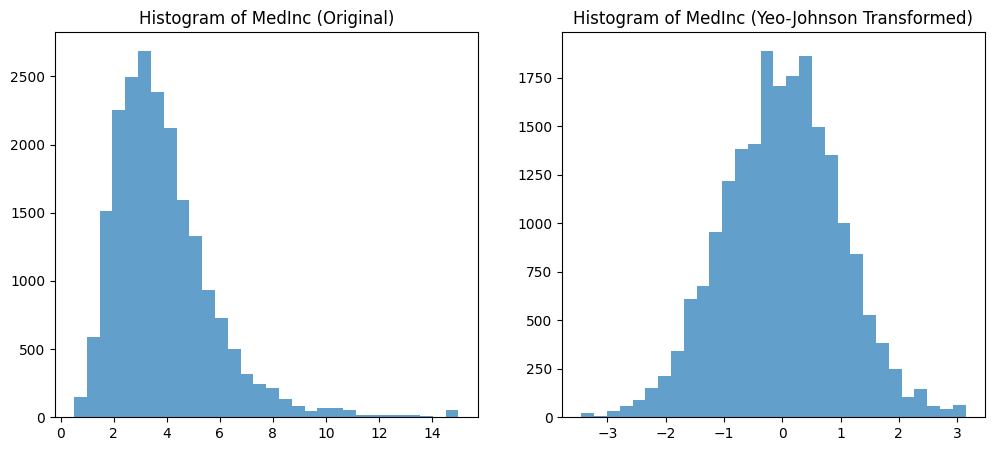

In [2]:
from sklearn.preprocessing import PowerTransformer

# 选择一个数值特征进行 Yeo-Johnson 变换
feature_to_transform = 'MedInc'

# 应用 Yeo-Johnson 变换
pt = PowerTransformer(method='yeo-johnson')
df[feature_to_transform + '_yeo_johnson'] = pt.fit_transform(df[[feature_to_transform]])

# 绘制变换前后的直方图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df[feature_to_transform], bins=30, alpha=0.7)
plt.title(f'Histogram of {feature_to_transform} (Original)')

plt.subplot(1, 2, 2)
plt.hist(df[feature_to_transform + '_yeo_johnson'], bins=30, alpha=0.7)
plt.title(f'Histogram of {feature_to_transform} (Yeo-Johnson Transformed)')
plt.show()

feature selection

互信息值：
MedInc: 0.3877
HouseAge: 0.0311
AveRooms: 0.1034
AveBedrms: 0.0243
Population: 0.0209
AveOccup: 0.0730
Latitude: 0.3686
Longitude: 0.4001

被选中的前 5% 的特征:
['Longitude']


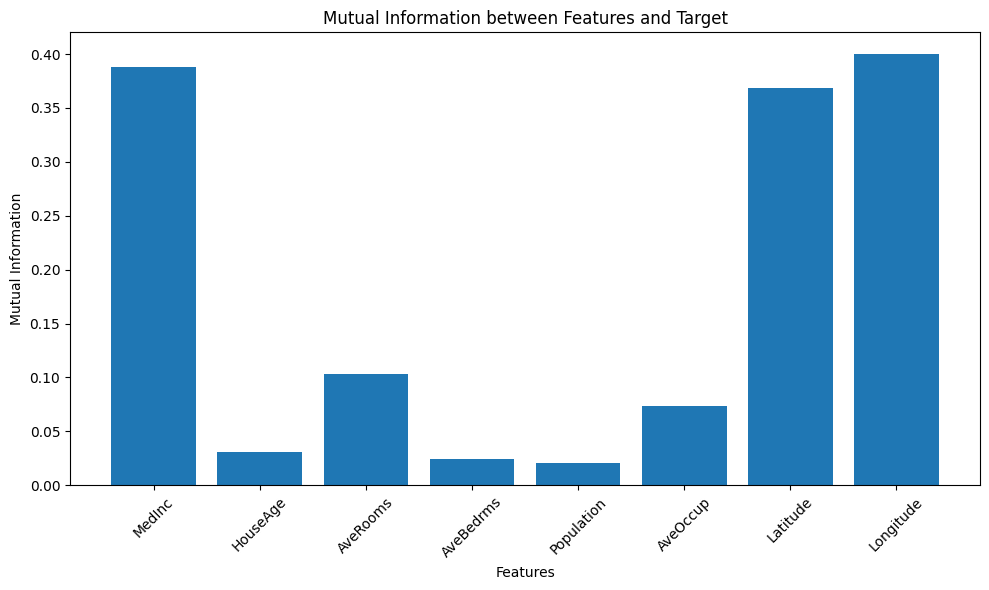

In [6]:


# 将数据转换为 DataFrame
df = pd.DataFrame(X, columns=california_housing.feature_names)

# 计算每个特征与目标变量的互信息
mi = mutual_info_regression(X, y)

# 打印互信息值
print("互信息值：")
for feature, score in zip(california_housing.feature_names, mi):
    print(f"{feature}: {score:.4f}")

# 特征选择：选择互信息值最高的前 5% 的特征
selector = mutual_info_regression(X, y)
percentile = 5  # 选择前 5% 的特征
threshold = np.percentile(selector, 100 - percentile)
selected_features = np.array(california_housing.feature_names)[selector >= threshold]

print("\n被选中的前 5% 的特征:")
print(selected_features)

# 可视化互信息值
plt.figure(figsize=(10, 6))
plt.bar(california_housing.feature_names, mi)
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information between Features and Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

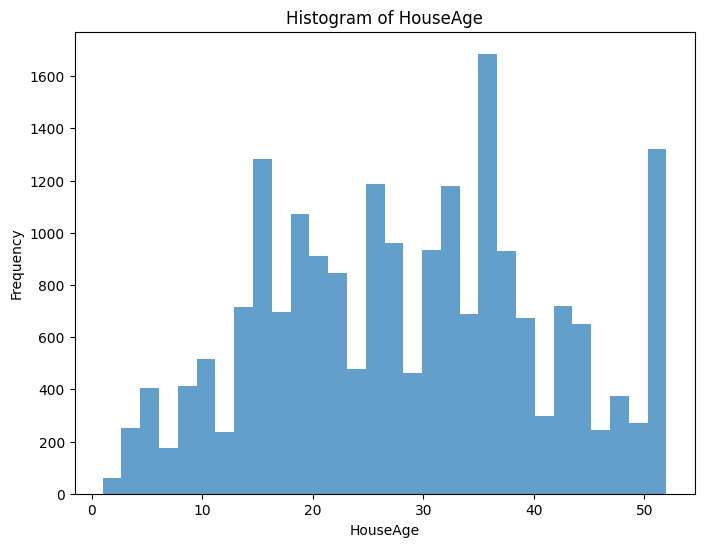

In [9]:
# 为任意一个数值特征构建直方图
feature_to_plot = 'HouseAge'

plt.figure(figsize=(8, 6))
plt.hist(df[feature_to_plot], bins=30, alpha=0.7)
plt.xlabel(feature_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_to_plot}')
plt.show()